In [13]:


!pip install -q opendatasets

import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

od.download("https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction/download?datasetVersionNumber=2")



Skipping, found downloaded files in "./company-bankruptcy-prediction" (use force=True to force download)


In [14]:
dt = pd.read_csv('/content/company-bankruptcy-prediction/data.csv')
dt.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [15]:
dt.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

array([[<Axes: title={'center': 'Bankrupt?'}>,
        <Axes: title={'center': ' ROA(C) before interest and depreciation before interest'}>,
        <Axes: title={'center': ' ROA(A) before interest and % after tax'}>,
        <Axes: title={'center': ' ROA(B) before interest and depreciation after tax'}>,
        <Axes: title={'center': ' Operating Gross Margin'}>,
        <Axes: title={'center': ' Realized Sales Gross Margin'}>,
        <Axes: title={'center': ' Operating Profit Rate'}>,
        <Axes: title={'center': ' Pre-tax net Interest Rate'}>,
        <Axes: title={'center': ' After-tax net Interest Rate'}>,
        <Axes: title={'center': ' Non-industry income and expenditure/revenue'}>],
       [<Axes: title={'center': ' Continuous interest rate (after tax)'}>,
        <Axes: title={'center': ' Operating Expense Rate'}>,
        <Axes: title={'center': ' Research and development expense rate'}>,
        <Axes: title={'center': ' Cash flow rate'}>,
        <Axes: title={'center

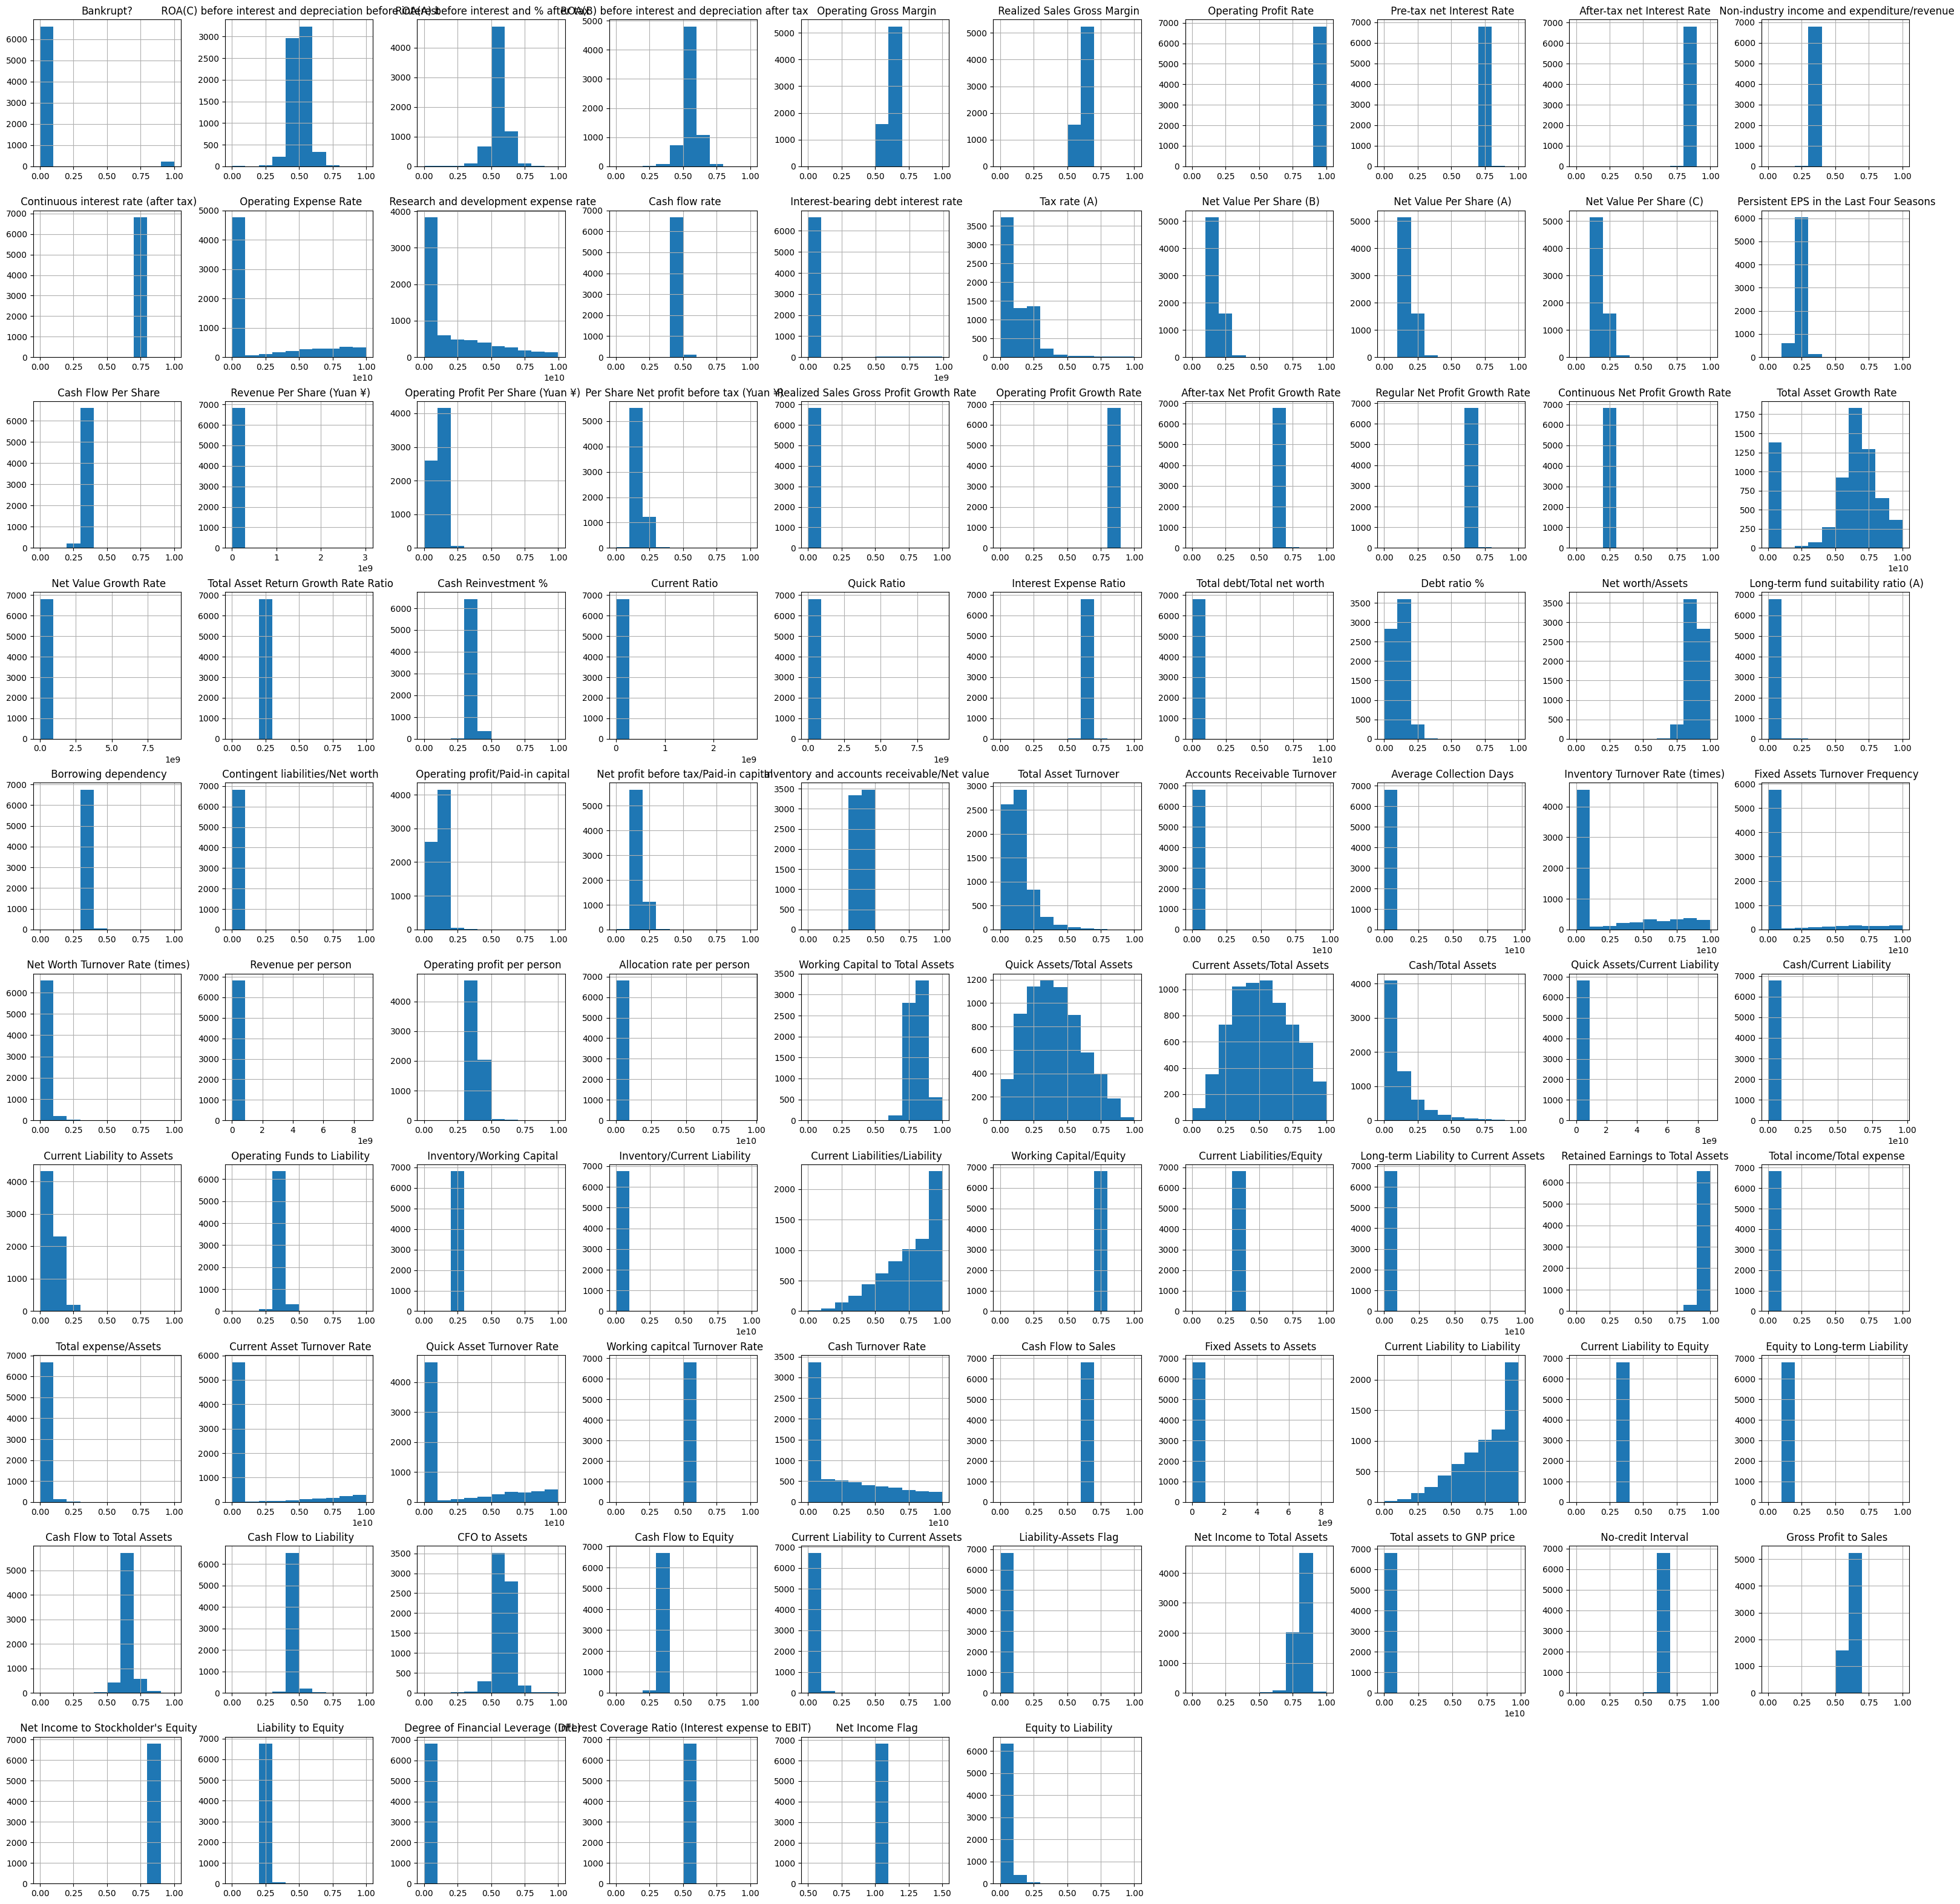

In [25]:
dt.hist(figsize = (40,40))

In [59]:
from sklearn.model_selection import train_test_split

X = dt.drop( ['Bankrupt?'] , axis=1)
y = dt['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2)


In [74]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

reg_mse = mean_squared_error(y_test, y_pred)


In [75]:
from sklearn.metrics import mean_squared_error

mean_baseline_prediction = y_train.mean()
y_test_baseline_prediction = [mean_baseline_prediction] * len(y_test)

mse_baseline = mean_squared_error(y_test, y_test_baseline_prediction)

print("Mean Squared Error for Baseline Model:", mse_baseline)
print("Mean Squared Error for Primary Model:", reg_mse)


Mean Squared Error for Baseline Model: 0.027113401579012045
Mean Squared Error for Primary Model: 0.030051956029616862


In [79]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

RFR.fit(X_train, y_train)


y_pred = RFR.predict(X_test)

rfr_mse = mean_squared_error(y_test, y_pred)

In [80]:
print("Mean Squared Error for Baseline Model:", mse_baseline)
print("Mean Squared Error for Primary Model:", rfr_mse)

Mean Squared Error for Baseline Model: 0.027113401579012045
Mean Squared Error for Primary Model: 0.019797360703812317


In [72]:
#Gradient Boosting Regression
from sklearn import ensemble
GBR = ensemble.GradientBoostingRegressor()
GBR.fit(X_train, y_train)

y_pred = GBR.predict(X_test)

gbr_mse = mean_squared_error(y_test, y_pred)

In [73]:
print("Mean Squared Error for Baseline Model:", mse_baseline)
print("Mean Squared Error for Primary Model:",gbr_mse)

Mean Squared Error for Baseline Model: 0.027113401579012045
Mean Squared Error for Primary Model: 0.019087435446384624


In [81]:
#Support Vector Regression (SVR)
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_mse = mean_squared_error(y_test, y_pred)

In [82]:
print("Mean Squared Error for Baseline Model:", mse_baseline)
print("Mean Squared Error for Primary Model:",svc_mse)

Mean Squared Error for Baseline Model: 0.027113401579012045
Mean Squared Error for Primary Model: 0.02785923753665689


In [110]:
#Neural Network Regression by scikit-learn
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp_reg = MLPRegressor(hidden_layer_sizes=(80, 40), activation='relu', solver='adam', alpha=0.0001,
                       batch_size=32, learning_rate='adaptive', max_iter=500)

mlp_reg.fit(X_train, y_train)

y_pred_mlp = mlp_reg.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)

In [111]:
print("Mean Squared Error for Baseline Model:", mse_baseline)
print("Mean Squared Error for MLPRegressor:", mse_mlp)

Mean Squared Error for Baseline Model: 0.027113401579012045
Mean Squared Error for MLPRegressor: 0.02842020791847613


In [120]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import mean_squared_error

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(in_features=X_train.shape[1], out_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=50)
        self.fc3 = nn.Linear(in_features=50, out_features=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    mse = mean_squared_error(y_test, y_pred.numpy())
    print("Mean Squared Error:", mse)



<ipython-input-120-8d586721bfc5>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-120-8d586721bfc5>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-120-8d586721bfc5>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-120-8d586721bfc5>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or

Epoch [1/10], Loss: 0.0403
Epoch [2/10], Loss: 0.0396
Epoch [3/10], Loss: 0.0391
Epoch [4/10], Loss: 0.0386
Epoch [5/10], Loss: 0.0382
Epoch [6/10], Loss: 0.0378
Epoch [7/10], Loss: 0.0375
Epoch [8/10], Loss: 0.0372
Epoch [9/10], Loss: 0.0369
Epoch [10/10], Loss: 0.0367
Mean Squared Error: 0.027187275
